In [2]:
import numpy as np
import matplotlib.pyplot as plt
import iminuit
import probfit
import uproot
import pandas as pd

In [4]:
input_file = uproot.open("trkana.Triggered.root")
input_tree = input_file["TrkAnaNeg/trkana"]
df = pd.DataFrame(data = input_tree)
file2 = uproot.open("reco-Delta40-trig.root")
RPCReco2 = file2["TrkAnaNeg/trkana"]
df2 = pd.DataFrame(data = RPCReco2)

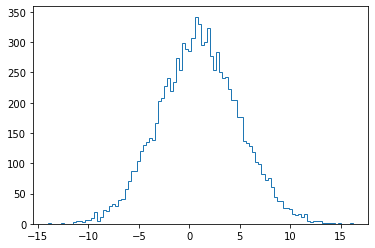

In [5]:
np.random.seed(0)
data = np.random.randn(10000) * 4 + 1
# sigma = 4 and mean = 1
plt.hist(data, bins=100, histtype='step');

In [6]:
# We will use the same PDF as in the previous example
def gauss_pdf(x, mu, sigma):
    """Normalized Gaussian"""
    return 1 / np.sqrt(2 * np.pi) / sigma * np.exp(-(x - mu) **2 / 2. / sigma ** 2)

In [7]:
# Binned chi^2 fit only makes sense (for now) for extended PDFs
# probfit.Extended adds a norm parameter with name 'N'
extended_gauss_pdf = probfit.Extended(gauss_pdf)

In [8]:
# Describe the function signature
iminuit.describe(extended_gauss_pdf)

['x', 'mu', 'sigma', 'N']

In [9]:
# Chi^2 distribution fit is really bad for distribution with long tail
# since when bin count=0... poisson error=0 and blows up chi^2
# so give it some range
chi2 = probfit.BinnedChi2(extended_gauss_pdf, data, bound=(-7,10))
# This time we use the pedantic=False option to tell Minuit
# that we don't want warnings about parameters without initial
# value or step size.
# And print_level=0 means that no output is generated
minuit = iminuit.Minuit(chi2, sigma=1, pedantic=False, print_level=0)
minuit.migrad();

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `print_fmin` is deprecated: Use `print(this_object.fmin)` instead
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `print_matrix` is deprecated: Use `print(this_object.matrix())` instead
  This is separate from the ipykernel package so we can avoid doing imports until


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 36.5                       │        Nfcn = 105 (105 total)        │
│ EDM = 6.85e-07 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───────┬──────────────────────┐
│       │     mu  sigma      N │
├───────┼──────────────────────┤
│    mu │  1.000 -0.102 -0.048 │
│ sigma │ -0.102  1.000  0.183 │
│     N │ -0.048  0.183  1.000 │
└───────┴──────────────────────┘


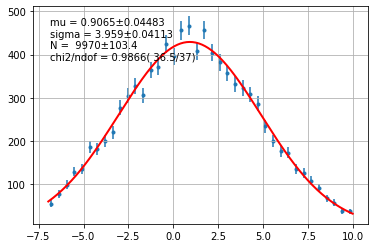

In [10]:
# Now let's look at the results
minuit.print_fmin()
minuit.print_matrix()
chi2.draw(minuit);